# "VAE颗粒" 与 "GAN颗粒" 的特征比较

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')
sns.set(font_scale=1.3)
sns.set_style({"font.family": "Monospace"})

from particle.utils.plotter import Violin

## 颗粒几何特征
- volume 体积
- surface 表面积
- radius 等效球半径
- sphericity 球度
- EI, FI 伸长率、扁平率
- convexity 凸度
- angularity 棱角度
- roughness 粗糙度

In [2]:
raw = np.load('output/geometry/trainSet.npz')
# vae = np.load('output/vae/nLatent64/geometry/vae.npz')
# gan = np.load('output/geometry/gan-29.npz')
# # test = np.load('output/geometry/test.npz')

# print(raw['surface'].shape, vae['surface'].shape, gan['surface'].shape)

violin = Violin((raw,), ('raw',))

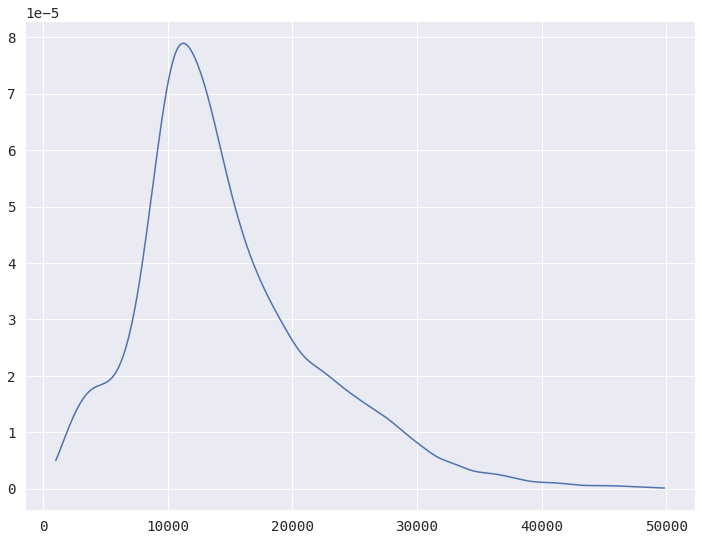

In [3]:
from scipy.stats import gaussian_kde
volume = raw['volume']
volume.sort()
kernel = gaussian_kde(volume)
xPlot = np.linspace(volume.min(), volume.max(), 1000)
dsty = kernel.pdf(xPlot)
plt.figure(figsize=(12, 9))
plt.plot(xPlot, dsty)

(array([2037., 6327., 9039., 4499., 2618., 1565.,  604.,  264.,  107.,
          47.]),
 array([ 1001. ,  5887.7, 10774.4, 15661.1, 20547.8, 25434.5, 30321.2,
        35207.9, 40094.6, 44981.3, 49868. ], dtype=float32),
 <BarContainer object of 10 artists>)

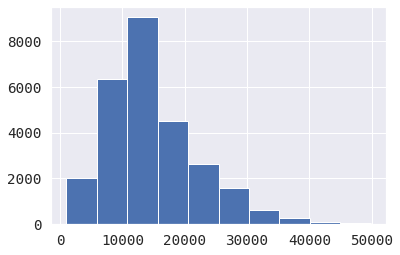

In [5]:
plt.hist(volume)

In [4]:
np.sum(dsty*(volume.max()-volume.min())/1000)

0.9956162582237446